Dataset Link: https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view



Problem 1:
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

Problem 2:
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Loading the datset
df = pd.read_csv("data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
# Finding the shape of the dataset
df.shape

(41266, 502)

In [4]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [10]:
# We are scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df=scaler.fit_transform(df)

In [31]:
scaled_df.shape

(41266, 502)

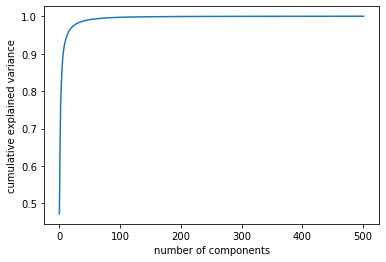

In [33]:
#sns.set_style('whitegrid')
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Problem 1:

In [37]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(scaled_df)
y_kmeans = k_means.fit_predict(scaled_df)
labels = k_means.labels_

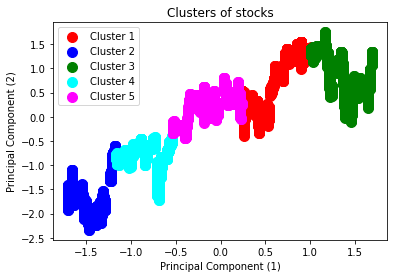

In [38]:
plt.scatter(scaled_df[y_kmeans == 0, 0], scaled_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_df[y_kmeans == 1, 0], scaled_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_df[y_kmeans == 2, 0], scaled_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_df[y_kmeans == 3, 0], scaled_df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(scaled_df[y_kmeans == 4, 0], scaled_df[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

# Problem 2:

In [39]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
df_comp.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064116,-0.061006,-0.039128,-0.040896,-0.062662,-0.009756,-0.035746,-0.054455,0.050145,-0.035261,...,-0.049236,0.056778,-0.054394,-0.050423,0.046987,-0.057669,-0.061151,-0.062229,0.002498,-0.051497
1,0.013460,-0.017836,-0.064281,0.033885,0.001886,-0.032434,0.043464,-0.029479,0.016120,0.058259,...,-0.058924,0.030252,0.013685,-0.040764,-0.052832,0.010248,0.031474,-0.020367,-0.081247,-0.059452
2,0.000257,-0.013690,-0.039765,0.064156,0.012142,0.043281,-0.037260,0.040575,-0.053959,-0.051098,...,-0.003135,0.022023,0.059652,-0.034497,-0.028736,-0.038999,-0.004302,0.021093,-0.066302,0.023674
3,-0.000057,0.011872,0.007578,0.077207,0.008521,-0.027793,-0.017217,0.009008,-0.032168,0.034345,...,0.021719,0.060973,-0.039576,0.027646,0.012222,-0.039697,0.002869,-0.002750,-0.049440,0.015092
4,0.015223,-0.054586,-0.032856,-0.016822,0.002549,-0.038383,-0.101752,-0.034551,-0.011474,0.037572,...,-0.036346,-0.011499,-0.030356,-0.011622,-0.045632,0.029278,-0.002911,-0.001172,-0.003602,0.005618


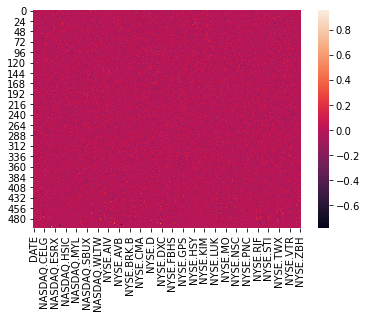

In [42]:
sns.heatmap(df_comp)
plt.show()

# Problem 3:

In [43]:
df['labels'] = labels

In [44]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,labels
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,1
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,1
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,1
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,1
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,1


In [45]:
df['labels'].unique()

array([1, 3, 4, 0, 2])

In [46]:
for i in df['labels'].unique().tolist():
    count = df[df['labels'] == i].shape[0]
    print('\nFor lablel {} the number of similar stock performances is : {} '.format(i,count))


For lablel 1 the number of similar stock performances is : 6647 

For lablel 3 the number of similar stock performances is : 7820 

For lablel 4 the number of similar stock performances is : 8999 

For lablel 0 the number of similar stock performances is : 8913 

For lablel 2 the number of similar stock performances is : 8887 


In [52]:
pca = PCA(n_components=2)
df_1 = pca.fit(scaled_df)

In [54]:
X_transformed = pca.transform(scaled_df)

In [55]:
from sklearn.cluster import SpectralClustering
hc = SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors')
hc.fit(X_transformed)

C:\Users\sanat\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [56]:
hc.fit_predict(X_transformed)

C:\Users\sanat\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 0, ..., 1, 1, 1])

In [57]:
y_labels = hc.labels_
len(y_labels),np.unique(y_labels)

(41266, array([0, 1, 2, 3, 4]))

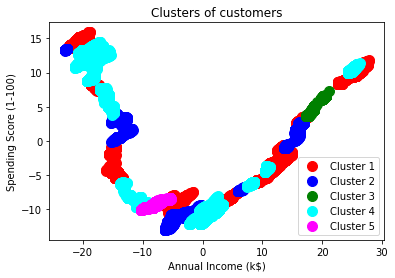

In [58]:
# Visualising the clusters
X = X_transformed
plt.scatter(X[y_labels == 0, 0], X[y_labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_labels == 1, 0], X[y_labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_labels == 2, 0], X[y_labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_labels == 3, 0], X[y_labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_labels == 4, 0], X[y_labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()